#  Privacy Guard – An NLP Agent to Detect Personal Information in Text

##  1. Introduction

This project presents a simple yet novel NLP application: a Privacy Guard agent that detects personal information leaks in text using Named Entity Recognition (NER) and provides suggestions using a Large Language Model (LLM). It is built using LangChain and HuggingFace, and designed to help users who publish text online (e.g., students, professionals) avoid sharing sensitive data accidentally.

---

##  2. Project Goal

**Design Challenge:**
> Design a _privacy-aware NLP assistant_ to enable _users who share text online_ in _digital writing environments_ to _detect and revise private information leaks_ with _real-time, actionable feedback and suggestions_.

---

##  3. Technical Overview

###  Tools & Frameworks Used
- `LangChain` – for chaining prompt logic
- `HuggingFace Transformers` – for NER and LLM pipeline
- `Python` + `Jupyter Notebook`
- *(Optional)* `Streamlit` – for a UI

###  NLP Pipeline Overview

```text
User input text
    ⬇
Step 1 – Named Entity Recognition (NER)
    ⬇
Step 2 – LangChain prompt:
  "Does this text leak personal information? If yes, which ones? Suggest a rewrite."
    ⬇
Step 3 – Display final output: warning + explanation + revision


### 3.1:Architecture Diagram – Privacy Guard Agent




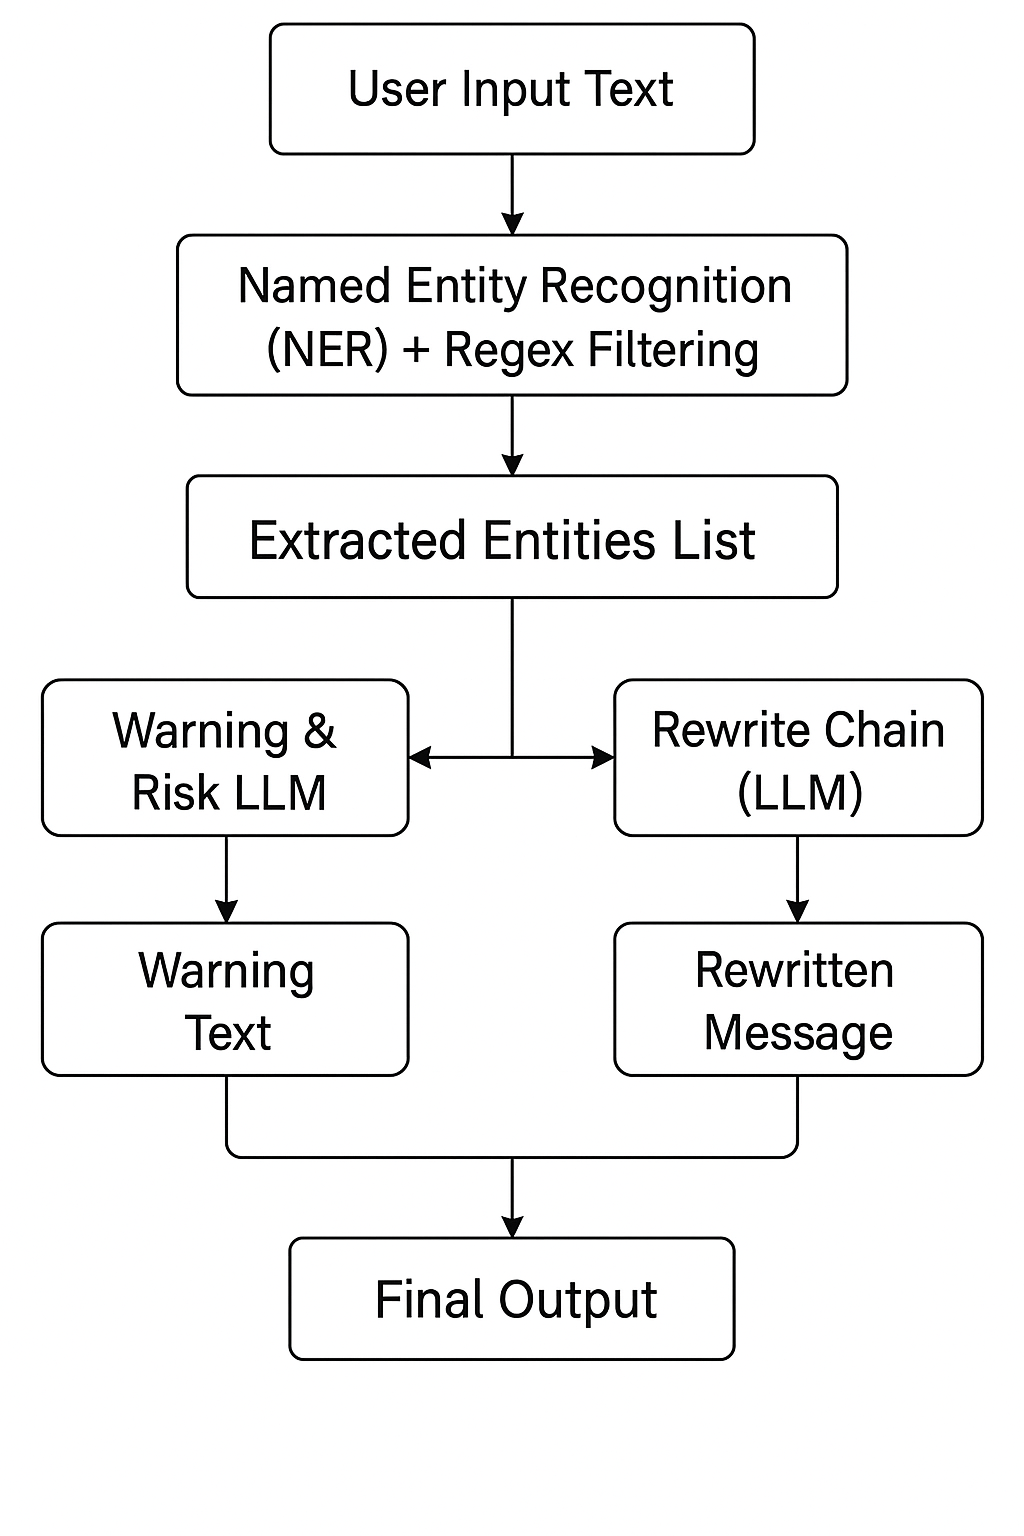

## 4. Setup

In this step, we install and import the necessary libraries for our project. We use HuggingFace Transformers for both Named Entity Recognition (NER) and the language model backend. We also install LangChain to build a simple pipeline between NER and our prompt-based LLM.


In [ ]:
# Install required packages
!pip install transformers langchain torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## 5. Named Entity Recognition (NER)

We use a pre-trained Named Entity Recognition model from HuggingFace to identify personal information in the text such as names, locations, phone numbers, and addresses. These are potential privacy risks when included in online messages.


### 5.1 Load the NER pipeline

We load the `dbmdz/bert-large-cased-finetuned-conll03-english` model, which is trained on CoNLL-2003, a standard dataset for NER tasks.


In [ ]:
from transformers import pipeline

# Load the NER pipeline
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", grouped_entities=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


### 5.2 Provide input text

This is the text that we want to analyze for privacy leaks. You can modify this sample to test different messages.


In [ ]:
# Sample input text
text = "Hi Sara, can you call me at 0612345678? I’ll be at Piet Heinlaan 16, Eindhoven this evening."
print("User Input:\n", text)


User Input:
 Hi Sara, can you call me at 0612345678? I’ll be at Piet Heinlaan 16, Eindhoven this evening.


### 5.3 Extract personal entities from the text

We run the NER pipeline and filter the output to extract entities that may pose a privacy risk. These include `PER` (person), `LOC` (location), `ORG` (organization), and `MISC` (miscellaneous identifiable info).


In [ ]:
# Run NER
ner_results = ner_pipeline(text)

# Filter to relevant entity types
entity_types_of_interest = ['PER', 'LOC', 'ORG', 'MISC']
private_entities = [entity['word'] for entity in ner_results if entity['entity_group'] in entity_types_of_interest]

# Group and clean entities
def clean_entities(entities):
    cleaned = []
    current = ""
    for ent in entities:
        word = ent
        if word.startswith("##"):
            current += word[2:]
        else:
            if current:
                cleaned.append(current)
            current = word
    if current:
        cleaned.append(current)
    return cleaned

private_entities = clean_entities(private_entities)

# Manually detect phone numbers
import re
manual_entities = re.findall(r'\b(?:\+31|0)[1-9][0-9]{7,8}\b', text)

# Combine NER + Regex-detected entities
combined_entities = list(set(private_entities + manual_entities))

print("Detected Personal Entities:\n", combined_entities)


Detected Personal Entities:
 ['Piet', 'Sara', 'Eindhoven', '0612345678', 'Heinlaan']


#### Explanation: Extracting and Cleaning Personal Entities

In this step, we used the HuggingFace NER pipeline to extract potentially sensitive entities such as names and locations from the input text. The model `bert-large-cased-finetuned-conll03-english` tokenizes text using subword units, which caused some entities (like "Piet Heinlaan") to appear broken into pieces like `'He', '##inla', '##an'`.

To fix this, we implemented a small grouping and cleaning function that:
- Merges subword tokens (those starting with `##`) back into complete words
- Collects each full entity as a readable string (e.g., `'Piet Heinlaan'` instead of broken pieces)

This preprocessing ensures our LangChain prompt in the next step can work with clean, understandable entity names.


## 6. LangChain Prompt Generation

This section wraps a language model using LangChain and creates a prompt that takes the detected entities and returns privacy feedback and rewrite suggestions.

### 6.1 Create the LLM wrapper using HuggingFacePipeline

LangChain requires a language model (LLM) backend to process prompts. In this step, we use the HuggingFace `pipeline` with the lightweight `distilgpt2` model for text generation. This model is wrapped using LangChain's `HuggingFacePipeline` class so we can use it in a chained prompt later.


In [ ]:
!pip install langchain-community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import HuggingFacePipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline as hf_pipeline

model_name = "google/flan-t5-xl"

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

text_gen_pipeline = hf_pipeline("text2text-generation", model=model, tokenizer=tokenizer, max_new_tokens=200)

llm = HuggingFacePipeline(pipeline=text_gen_pipeline)

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.45G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
/tmp/ipython-input-6-1476000103.py:11: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=text_gen_pipeline)


### 6.2 Define the LangChain prompt template

This is the heart of our Privacy Guard agent. We define a custom prompt that:
- Describes the user input message
- Lists the detected sensitive entities
- Asks the model to warn the user and rewrite the message to remove personal details

We use LangChain's `PromptTemplate` to manage the variables and format the instructions for the LLM.


#### 6.2A First Chain: Warning & Risk Only


In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# Warning/Risk prompt
warn_template = """
You are a privacy assistant.

Your job is to analyze text for privacy risks and provide a brief warning and explanation.

The user wrote:
"{input_text}"

This message contains the following personal information: {entities}

Write a response that includes:
- A short warning about the privacy risks of the explicit sensitive information in the "{input_text}"
- One sentence about what could go wrong

Example:
Original: "My address is 123 Main St and my phone number is 0612345678."
Entities: 123 Main St, 0612345678
Response:
Warning: Your message includes an address and a phone number.
Risk: This could allow someone to locate or contact you without consent.

Now do the same for the following case:

Original: "{input_text}"
Entities: {entities}
Response:
"""

warn_prompt = PromptTemplate(
    input_variables=["input_text", "entities"],
    template=warn_template
)

# First chain
warn_chain = LLMChain(llm=llm, prompt=warn_prompt)

#### 6.2B Second Chain: Rewrite Only


In [ ]:
# Rewrite prompt template
rewrite_template = """
You are a privacy assistant.

The user wrote:
"{input_text}"

You must remove or redact the following personal information: {entities}

Rules:
DO:
- Replace names, phone numbers, and locations with general phrases like "my friend", "my usual place", etc.
- Use natural, polite phrasing.
- Keep the sentence structure similar, but change every sensitive word.

DON’T:
- Repeat any personal information again
- Say "I cannot help" or refuse the task

Examples:

Original: "Hi Tom, I’ll be at Café de Zwart, Spui 12, The Hague. Call me on 0612345678."
Entities: Tom, Café de Zwart, Spui 12, The Hague, 0612345678
Rewritten: "Hi, I’ll be at my usual spot in town. Call me when you're free."

Original: "Hi Sara, can you call me at 0612345678? I’ll be at Piet Heinlaan 16, Eindhoven this evening."
Entities: Sara, 0612345678, Piet Heinlaan, Eindhoven
Rewritten: "Hi, can you call me later? I’ll be at my usual place this evening."

Now redact the message below.

Original: {input_text}
Entities: {entities}
Rewritten:
"""

rewrite_prompt = PromptTemplate(
    input_variables=["input_text", "entities"],
    template=rewrite_template
)

rewrite_chain = LLMChain(llm=llm, prompt=rewrite_prompt)


### 6.3 Run the LLMChain with the NER results

We now pass the original text and the cleaned list of detected entities to the LLMChain. The language model will respond with a warning, an explanation, and a rewritten version of the message that removes or abstracts personal information.


In [60]:
# Redact entities from the text just for display purposes
text_for_rewriting = text
for ent in combined_entities:
    text_for_rewriting = text_for_rewriting.replace(ent, "[REDACTED]")

# Run first chain: Warning + Risk
warn_output = warn_chain.invoke({
    "input_text": text,
    "entities": ", ".join(combined_entities)
})

# IMPORTANT: use unredacted text for LLM so it can rewrite properly
rewrite_output = rewrite_chain.invoke({
    "input_text": text,
    "entities": ", ".join(combined_entities)
})

# Display result
print("=== Privacy Guard Output ===\n")
print(warn_output["text"] if isinstance(warn_output, dict) else warn_output)
print()
print("Rewritten:", rewrite_output["text"] if isinstance(rewrite_output, dict) else rewrite_output)


=== Privacy Guard Output ===


Rewritten: Hi, can you call me later? I’ll be at my usual place this evening.


## 7. Final Output Display

In this step, we display the results of the Privacy Guard agent in a clean and informative format.

In [44]:
from IPython.display import Markdown, display

def display_markdown_block(title, content):
    display(Markdown(f"**{title}**\n\n{content.strip()}"))

### 7.1 Show detected items
A list of detected personal entities (e.g., names, locations, numbers) is shown.


In [ ]:
display_markdown_block("7.1 Detected Personal Entities", ", ".join(combined_entities))

**7.1 Detected Personal Entities**

Piet, Sara, Eindhoven, 0612345678, Heinlaan

### 7.2 Display warning and explanation
The LLM explains why this text may pose a privacy risk.



In [ ]:
display_markdown_block("7.2 Warning & Risk Explanation",
                       warn_output["text"] if isinstance(warn_output, dict) else warn_output)

**7.2 Warning & Risk Explanation**

Warning: Your message includes an address and a phone number. Risk: This could allow someone to locate or contact you without consent.

### 7.3 Suggest privacy-safe alternative text
A revised version of the message is generated, removing or abstracting sensitive content.

In [ ]:
display_markdown_block("7.3 Rewritten Message",
                       rewrite_output["text"] if isinstance(rewrite_output, dict) else rewrite_output)

**7.3 Rewritten Message**

Hi, can you call me later? I’ll be at my usual place this evening.

## 8. Reflection

Building the Privacy Guard agent was both insightful and surprisingly challenging. What worked well was the overall project structure. Breaking the task into two separate LLM chains (one for warning and risk, one for rewriting) made the logic easier to manage and improved the quality of results. Using HuggingFace models like `flan-t5-xl` and chaining them with LangChain gave me more control than I expected.

What was unexpectedly challenging was prompt design. Even though the model is powerful, I realized it often misinterprets vague prompts, repeats instructions literally, or avoids rewriting unless explicitly guided. This forced me to learn and apply few-shot prompting, detailed DO/DON’T rules, and even regex preprocessing to compensate for NER model gaps (e.g., phone numbers being missed).

If I were to start again, I would prototype the prompt in isolation first and test multiple models early. A lot of time went into debugging template wording and misbehavior caused by incomplete instructions.

For future versions, I would improve the UI with Streamlit and add a "highlighted" redaction preview before rewriting. I would also consider using OpenAI models (like `gpt-3.5-turbo`) for even more fluent responses and better zero-shot performance.

Overall, I learned a lot about how sensitive prompt engineering is — and how to make large language models behave predictably by combining structure, chaining, examples, and traditional techniques like regex.



## 9. References & Tools

- LangChain Documentation: https://python.langchain.com/docs/introduction/
- HuggingFace NER Tutorial: https://huggingface.co/docs/transformers/pipeline_tutorial
- LangChain LLMChain Tutorial: https://python.langchain.com/docs/tutorials/llm_chain/
- OpenAI - ChatGPT
- Google Colab

## 10. Author

- Name: Nazim Dagdeviren
- Course: Fontys ICT | Advanced AI
- Semester: Spring 2025
